<a href="https://colab.research.google.com/github/pintu7414/surveillance-system-using-image-classfiction/blob/master/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 2.x
!pip install -q tf-hub-nightly==0.8.0.dev201911110007
!pip install -q git+https://github.com/tensorflow/examples

TensorFlow 2.x selected.
     |████████████████████████████████| 92kB 3.1MB/s 


In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np

import tensorflow as tf
assert tf.__version__.startswith('2')

from tensorflow_examples.lite.model_customization.core.data_util.image_dataloader import ImageClassifierDataLoader
from tensorflow_examples.lite.model_customization.core.task import image_classifier
from tensorflow_examples.lite.model_customization.core.task.model_spec import efficientnet_b0_spec
from tensorflow_examples.lite.model_customization.core.task.model_spec import ImageModelSpec

import matplotlib.pyplot as plt

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


In [0]:
downloaded = drive.CreateFile({'id':'1ZRsN5Q8svaUFURCLeoxRvrcT7cOx7p2r'}) # replace the id with id of file you want to access
downloaded.GetContentFile('flower_photos.zip') 


In [0]:

!unzip flower_photos.zip

Archive:  flower_photos.zip
   creating: flower_photos/
  inflating: flower_photos/LICENSE.txt  
   creating: flower_photos/fight/
  inflating: flower_photos/fight/0053.jpg  
  inflating: flower_photos/fight/001111.jpg  
  inflating: flower_photos/fight/678.jpg  
  inflating: flower_photos/fight/456.jpg  
  inflating: flower_photos/fight/0025.jpg  
  inflating: flower_photos/fight/0055.jpg  
  inflating: flower_photos/fight/0005.jpg  
  inflating: flower_photos/fight/0000021.jpg  
  inflating: flower_photos/fight/0057.jpg  
  inflating: flower_photos/fight/0028.jpg  
  inflating: flower_photos/fight/178.jpg  
  inflating: flower_photos/fight/werwe.jpg  
  inflating: flower_photos/fight/0041.jpg  
  inflating: flower_photos/fight/0014.jpg  
  inflating: flower_photos/fight/avsdvd.jpg  
  inflating: flower_photos/fight/0056.jpg  
  inflating: flower_photos/fight/asdd3qw4r3.jpg  
 extracting: flower_photos/fight/13123w12.jpg  
 extracting: flower_photos/fight/0006.jpg  
 extracting: flowe

In [0]:
data = ImageClassifierDataLoader.from_folder('/content/flower_photos')
train_data, test_data = data.split(0.9)

INFO:tensorflow:Load image with size: 2298, num_label: 5, labels: Temp Explosion, fight, roses, sunflowers, tulips.


In [0]:
model = image_classifier.create(train_data)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     multiple                  2257984   
_________________________________________________________________
dropout (Dropout)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  6405      
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________
None
INFO:tensorflow:Retraining the models...


INFO:tensorflow:Retraining the models...


Train for 64 steps
Epoch 1/5
64/64 [==============================] - 17s 262ms/step - loss: 0.8814 - accuracy: 0.7788
Epoch 2/5
64/64 [==============================] - 9s 139ms/step - loss: 0.6459 - accuracy: 0.9019
Epoch 3/5
64/64 [==============================] - 9s 138ms/step - loss: 0.6070 - accuracy: 0.9238
Epoch 4/5
64/64 [==============================] - 9s 137ms/step - loss: 0.5750 - accuracy: 0.9346
Epoch 5/5
64/64 [==============================] - 9s 137ms/step - loss: 0.5607 - accuracy: 0.9404


In [0]:
loss, accuracy = model.evaluate(test_data)

8/8 [==============================] - 4s 468ms/step - loss: 0.6884 - accuracy: 0.9217


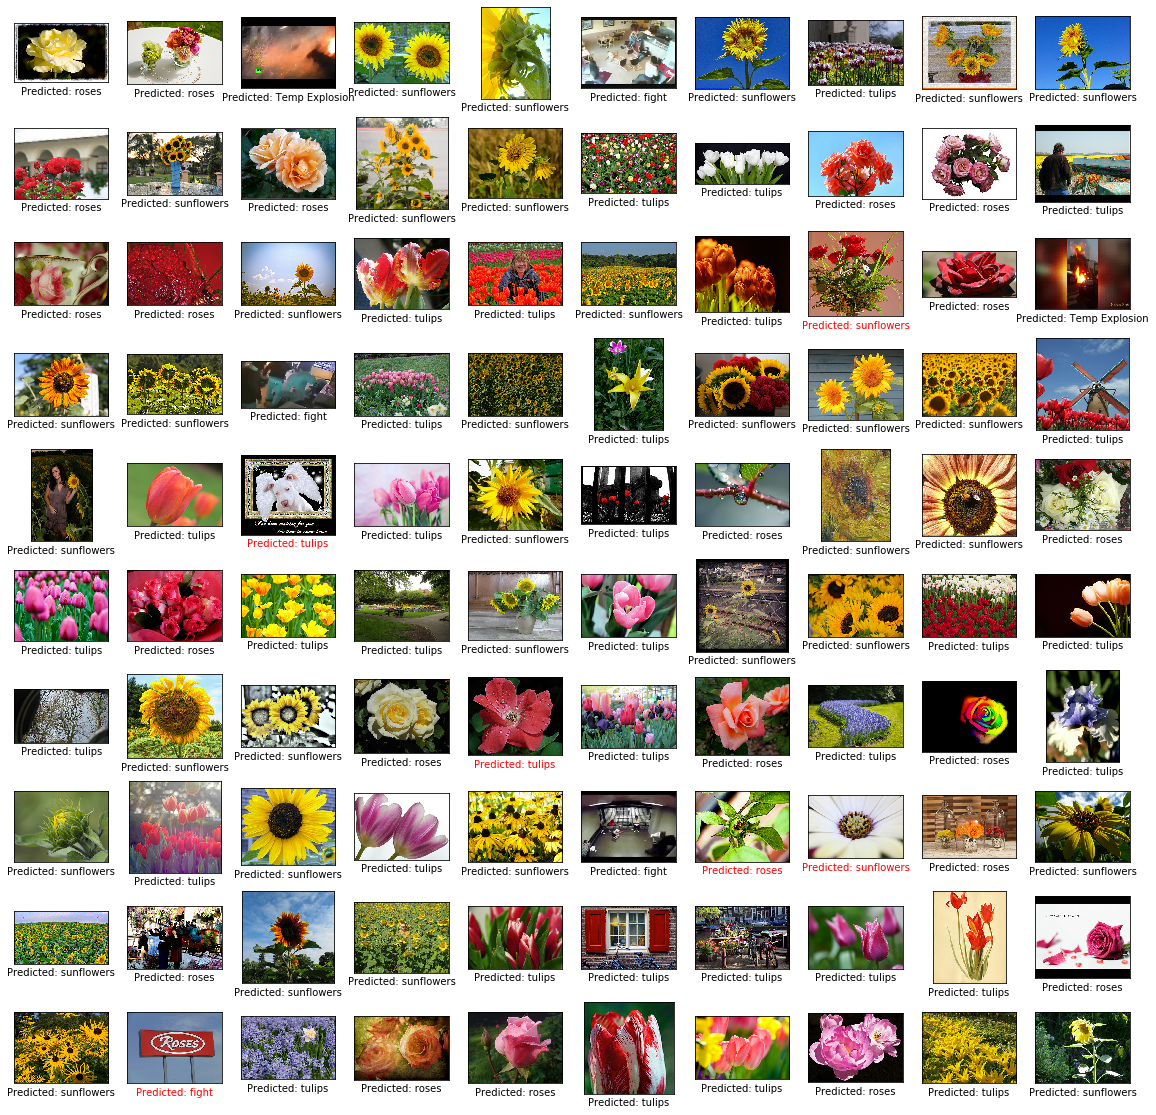

In [0]:
# A helper function that returns 'red'/'black' depending on if its two input
# parameter matches or not.
def get_label_color(val1, val2):
  if val1 == val2:
    return 'black'
  else:
    return 'red'

# Then plot 100 test images and their predicted labels.
# If a prediction result is different from the label provided label in "test"
# dataset, we will highlight it in red color.
plt.figure(figsize=(20, 20))
predicts = model.predict_top_k(test_data)
for i, (image, label) in enumerate(test_data.dataset.take(100)):
  ax = plt.subplot(10, 10, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)

  predict_label = predicts[i][0][0]
  color = get_label_color(predict_label,
                          test_data.index_to_label[label.numpy()])
  ax.xaxis.label.set_color(color)
  plt.xlabel('Predicted: %s' % predict_label)
plt.show()

In [0]:
predicts = model.predict_top_k('/content/piiy.jpg')

AttributeError: ignored

In [0]:
import os
a = []
for path, subdirs, files in os.walk(r'/content'):
   for filename in files:
     #f = os.path.join(path, filename)
     a.append(str(filename))



In [0]:
print(a)
a = ['piiy.jpg', 'photo.jpg']

['photo.jpg', 'videoplayback.mp4', 'adc.json', 'piiy.jpg', 'flower_photos.zip', '.last_survey_prompt.yaml', 'config_sentinel', 'active_config', '.last_update_check.json', 'gce', 'credentials.db', 'access_tokens.db', '.metricsUUID', 'config_default', '16.37.24.945113.log', '16.37.08.645258.log', '16.37.40.784290.log', '16.37.37.002045.log', '16.37.53.587497.log', '16.37.53.933238.log', '03.29.53.789165.log', '.boto', 'adc.json', 'LICENSE.txt', '7316409504_7cf3707f8a_m.jpg', '19153732586_9de58c8f53_n.jpg', '20596941736_f2c5f496cf.jpg', '4918137796_21f0922b0c_n.jpg', '1469726748_f359f4a8c5.jpg', '17990320484_93bba345d2_m.jpg', '15011625580_7974c44bce.jpg', '4231745228_ece86330d9.jpg', '3203779656_3580151ea4_m.jpg', '898102603_2d5152f09a.jpg', '4797595918_79887b1229_n.jpg', '7420699022_60fa574524_m.jpg', '5212877807_a3ddf06a7c_n.jpg', '10894627425_ec76bbc757_n.jpg', '6036837996_7fbdcdb3c5_n.jpg', '3971662839_5cb2963b20_n.jpg', '2892056920_918c52889b_m.jpg', '18599603859_f2ec616ddf_n.jpg', 

In [0]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
       new Promise((resolve) => capture.onclick = resolve);
       new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return str('3')+filename
  

In [0]:
b = []
for it in a:
  b.append(take_photo(it))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [0]:
print(b)


['3piiy.jpg', '3photo.jpg']


In [0]:
predicts = model.predict_top_k(b)


AttributeError: ignored

# New Section

In [0]:
from IPython.display import Image
try:
  for it in a:
    filename = take_photo(it)
    print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
    display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

<IPython.core.display.Javascript object>

Saved to 3piiy.jpg


<IPython.core.display.Javascript object>

Saved to 3photo.jpg


DisabledFunctionError: ignored

In [0]:
from IPython.display import HTML
from base64 import b64encode
mp4 = open('videoplayback.mp4','rb').read()
data_url = "content:videoplayback/mp4;base64," + b64encode(mp4).decode()


In [0]:
HTML("""
<video id ="myVid" width="400" height="200">
 <source src="videoplayback.mp4" type="video/mp4">
  Sorry, your browser does not support HTML5 video.
</video>
<script> 
var myVideo = document.getElementById("myVid");
 myVideo.play(); 
</script> 
""" )

In [0]:
import numpy as np
import cv2

cap = cv2.VideoCapture(r"/content/videoplayback.mp4")

res=(360,240) #resolution
fourcc = cv2.VideoWriter_fourcc(*'MP4V') #codec
out = cv2.VideoWriter("/content/videoplayback.mp4", fourcc, 20.0, res)
!ls

while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()
    cv2_imshow(frame)
    

    out.write(frame)
    
#    print("Frame number: " + str(counter))
#    counter = counter+1
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
out.release()
cv2.destroyAllWindows()

abck.mp4  flower_photos      photo.jpg	project      sample_data
adc.json  flower_photos.zip  piiy.jpg	project.zip  videoplayback.mp4


AttributeError: ignored

In [0]:
import cv2 as cv
cap = cv.VideoCapture(0)
cap.imshow()
# Parameters for lucas kanade optical flow
print(cap.read())
# Take first frame and find corners in it
ret, old_frame = cap.read()
#old_frame=cv.resize(old_frame,(720,480))
#
#old_frame.imshow()
print(ret)

AttributeError: ignored

In [0]:
! pip install opencv

ERROR: Could not find a version that satisfies the requirement opencv (from versions: none)
ERROR: No matching distribution found for opencv


In [0]:
import cv2

In [0]:
cv2.__version__

'4.1.2'

In [0]:
# import the necessary packages
from keras.models import load_model
from collections import deque
import numpy as np
import argparse
import pickle
import cv2

# construct the argument parser and parse the arguments
ap = argparse.ArgumentParser()
ap.add_argument("-m", "--model", required=True,
	help="path to trained serialized model")
ap.add_argument("-l", "--label-bin", required=True,
	help="path to  label binarizer")
ap.add_argument("-i", "--input", required=True,
	help="path to our input video")
ap.add_argument("-o", "--output", required=True,
	help="path to our output video")
ap.add_argument("-s", "--size", type=int, default=128,
	help="size of queue for averaging")
args = vars(ap.parse_args())

# load the trained model and label binarizer from disk
print("[INFO] loading model and label binarizer...")
model = load_model(args["model"])
lb = pickle.loads(open(args["label_bin"], "rb").read())

# initialize the image mean for mean subtraction along with the
# predictions queue
mean = np.array([123.68, 116.779, 103.939][::1], dtype="float32")
Q = deque(maxlen=args["size"])

Using TensorFlow backend.
usage: ipykernel_launcher.py [-h] -m MODEL -l LABEL_BIN -i INPUT -o OUTPUT
                             [-s SIZE]
ipykernel_launcher.py: error: the following arguments are required: -m/--model, -l/--label-bin, -i/--input, -o/--output


SystemExit: ignored

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2890: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [0]:
# USAGE
# python predict_video.py --model model/activity.model --label-bin model/lb.pickle --input example_clips/lifting.mp4 --output output/lifting_128avg.avi --size 128

# import the necessary packages
from keras.models import load_model
from collections import deque
import numpy as np
import argparse
import pickle
import cv2

# construct the argument parser and parse the arguments
ap = argparse.ArgumentParser()
ap.add_argument("-m", "--model", required=True,
	help="path to trained serialized model")
ap.add_argument("-l", "--label-bin", required=True,
	help="path to  label binarizer")
ap.add_argument("-i", "--input", required=True,
	help="path to our input video")
ap.add_argument("-o", "--output", required=True,
	help="path to our output video")
ap.add_argument("-s", "--size", type=int, default=128,
	help="size of queue for averaging")
args = vars(ap.parse_args())

# load the trained model and label binarizer from disk
print("[INFO] loading model and label binarizer...")
model = load_model(args["model"])
lb = pickle.loads(open(args["label_bin"], "rb").read())

# initialize the image mean for mean subtraction along with the
# predictions queue
mean = np.array([123.68, 116.779, 103.939][::1], dtype="float32")
Q = deque(maxlen=args["size"])

# initialize the video stream, pointer to output video file, and
# frame dimensions
vs = cv2.VideoCapture(args["input"])
writer = None
(W, H) = (None, None)

# loop over frames from the video file stream
while True:
	# read the next frame from the file
	(grabbed, frame) = vs.read()

	# if the frame was not grabbed, then we have reached the end
	# of the stream
	if not grabbed:
		break

	# if the frame dimensions are empty, grab them
	if W is None or H is None:
		(H, W) = frame.shape[:2]

	# clone the output frame, then convert it from BGR to RGB
	# ordering, resize the frame to a fixed 224x224, and then
	# perform mean subtraction
	output = frame.copy()
	frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
	frame = cv2.resize(frame, (224, 224)).astype("float32")
	frame -= mean

	# make predictions on the frame and then update the predictions
	# queue
	preds = model.predict(np.expand_dims(frame, axis=0))[0]
	Q.append(preds)

	# perform prediction averaging over the current history of
	# previous predictions
	results = np.array(Q).mean(axis=0)
	i = np.argmax(results)
	label = lb.classes_[i]

	# draw the activity on the output frame
	text = "activity: {}".format(label)
	cv2.putText(output, text, (35, 50), cv2.FONT_HERSHEY_SIMPLEX,
		1.25, (0, 255, 0), 5)

	# check if the video writer is None
	if writer is None:
		# initialize our video writer
		fourcc = cv2.VideoWriter_fourcc(*"MJPG")
		writer = cv2.VideoWriter(args["output"], fourcc, 30,
			(W, H), True)

	# write the output frame to disk
	writer.write(output)

	# show the output image
	cv2.imshow("Output", output)
	key = cv2.waitKey(1) & 0xFF

	# if the `q` key was pressed, break from the loop
	if key == ord("q"):
		break

# release the file pointers
print("[INFO] cleaning up...")
writer.release()
vs.release()


In [0]:
HTML("""

<button onclick="playVid()" type="button">Play Video</button>
<button onclick="pauseVid()" type="button">Pause Video</button><br> 

<video id="myVideo" width="320" height="176">
  <source src="/content/videoplayback.mp4" type="video/mp4">
  Your browser does not support HTML5 video.
</video>

<script> 
var vid = document.getElementById("myVideo"); 

function playVid() { 
  vid.play(); 
} 

function pauseVid() { 
  vid.pause(); 
} 
</script> 

""" )